<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/MLM_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Design Matrix X:**
 This is the design matrix for the fixed effect (e.g., hours studied). The first column is all ones to account for the intercept, and the second column represents the number of hours studied by each individual.
- **Design Matrix Z:**This is the design matrix for the random effect, indicating which group each individual belongs to. It has one column for each group, with a 1 for the respective group and 0 elsewhere.
- **True Coefficients:** The true fixed effect coefficients (
$ 𝛽_{true} $ ) and random effects ($ u_{true} $)
​are used to generate the response variable
𝑦.
- **Variance-Covariance Matrix 𝑉 :**
This matrix is constructed from the variance of the random effects (
𝐺) and the variance of the residual errors (𝑅). It accounts for the total variability in the data.

The fixed effects 𝛽 are estimated using Generalized Least Squares (GLS).
The random effects 𝑢 are estimated using the BLUP formula, which combines information from both the observed data and the estimated fixed effects.

In [1]:
import numpy as np
import scipy.linalg

# Toy data: 2 groups with 4 data points in each
n_groups = 2
n_per_group = 4

# Fixed effect (predictor): hours studied for each individual
X = np.array([[1, 1.0],  # Group 1, individual 1
              [1, 2.0],  # Group 1, individual 2
              [1, 3.0],  # Group 1, individual 3
              [1, 4.0],  # Group 1, individual 4
              [1, 1.5],  # Group 2, individual 1
              [1, 2.5],  # Group 2, individual 2
              [1, 3.5],  # Group 2, individual 3
              [1, 4.5]]) # Group 2, individual 4

# Random effect design matrix (indicating group membership)
Z = np.array([[1, 0],  # Group 1 random effect
              [1, 0],
              [1, 0],
              [1, 0],
              [0, 1],  # Group 2 random effect
              [0, 1],
              [0, 1],
              [0, 1]])

# True fixed effect coefficient and random effect for each group
beta_true = np.array([2.0, 1.5])  # Intercept = 2, slope for hours studied = 1.5
u_true = np.array([0.5, -0.5])    # Random intercepts for Group 1 and Group 2

# Generate response variable y (fixed + random + noise)
y = X @ beta_true + Z @ u_true + np.random.normal(0, 0.1, size=8)

# Display the data
print("Design Matrix X (fixed effects):")
print(X)
print("\nDesign Matrix Z (random effects):")
print(Z)
print("\nResponse Vector y:")
print(y)

# Covariance matrices for random effects and residuals
sigma_u = 0.5  # Variance of random effects
sigma_e = 0.1  # Variance of residuals (noise)

# Construct the variance-covariance matrix V
G = sigma_u**2 * np.eye(n_groups)  # Variance of random effects
R = sigma_e**2 * np.eye(n_per_group * n_groups)  # Residual variance (noise)

V = Z @ G @ Z.T + R  # Total covariance matrix

# Generalized least squares solution for fixed effects
# beta_hat = (X^T V^(-1) X)^(-1) X^T V^(-1) y
V_inv = np.linalg.inv(V)
beta_hat = np.linalg.inv(X.T @ V_inv @ X) @ (X.T @ V_inv @ y)

# Solve for random effects using BLUP (Best Linear Unbiased Predictor)
# u_hat = G Z^T V^(-1) (y - X beta_hat)
u_hat = G @ Z.T @ V_inv @ (y - X @ beta_hat)

# Output estimated fixed and random effects
print("\nEstimated fixed effects (beta_hat):")
print(beta_hat)

print("\nEstimated random effects (u_hat):")
print(u_hat)


Design Matrix X (fixed effects):
[[1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  4. ]
 [1.  1.5]
 [1.  2.5]
 [1.  3.5]
 [1.  4.5]]

Design Matrix Z (random effects):
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]

Response Vector y:
[3.80815521 5.64923602 6.87730024 8.36500538 3.92544729 5.09324152
 6.77277058 8.29018238]

Estimated fixed effects (beta_hat):
[2.02015861 1.48273044]

Estimated random effects (u_hat):
[ 0.44350445 -0.44350445]


**Visualization**

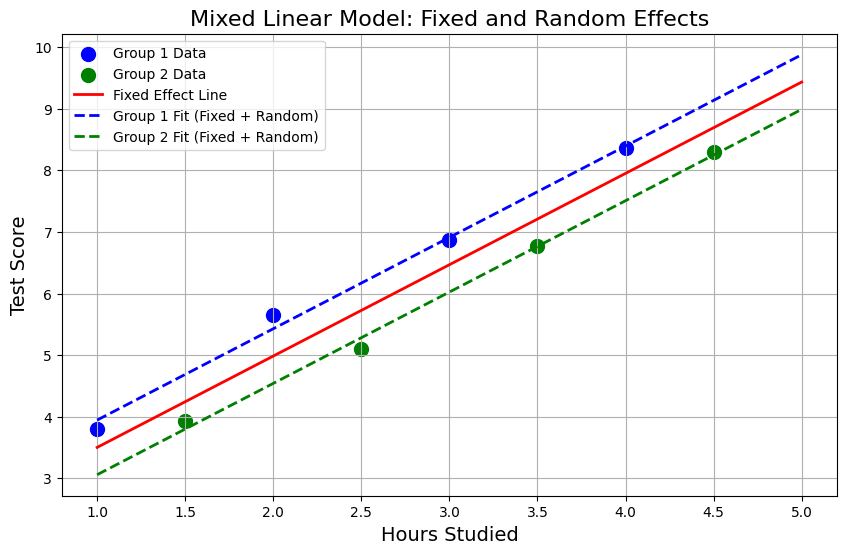

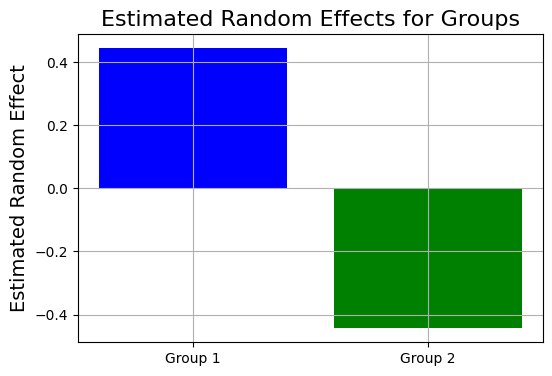

In [2]:
import matplotlib.pyplot as plt

# Group labels for visualization
group_labels = ['Group 1', 'Group 2']

# Plot actual data points and fitted fixed effect line
plt.figure(figsize=(10, 6))

# Plot Group 1 data points
plt.scatter(X[:4, 1], y[:4], color='blue', label='Group 1 Data', s=100)
# Plot Group 2 data points
plt.scatter(X[4:, 1], y[4:], color='green', label='Group 2 Data', s=100)

# Plot the fitted fixed effects line
x_line = np.linspace(1, 5, 100)
y_fixed = beta_hat[0] + beta_hat[1] * x_line
plt.plot(x_line, y_fixed, label='Fixed Effect Line', color='red', linewidth=2)

# Add random effects to the fixed line for Group 1 and Group 2
y_group1 = beta_hat[0] + u_hat[0] + beta_hat[1] * x_line
y_group2 = beta_hat[0] + u_hat[1] + beta_hat[1] * x_line

plt.plot(x_line, y_group1, label='Group 1 Fit (Fixed + Random)', color='blue', linestyle='--', linewidth=2)
plt.plot(x_line, y_group2, label='Group 2 Fit (Fixed + Random)', color='green', linestyle='--', linewidth=2)

# Customize plot
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Test Score', fontsize=14)
plt.title('Mixed Linear Model: Fixed and Random Effects', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Bar plot to visualize estimated random effects for each group
plt.figure(figsize=(6, 4))
plt.bar(group_labels, u_hat, color=['blue', 'green'])
plt.ylabel('Estimated Random Effect', fontsize=14)
plt.title('Estimated Random Effects for Groups', fontsize=16)
plt.grid(True)
plt.show()
